# Multi Agent Artificial Intelligence Practice - Cournot Duopoly

Cournot Duopoly is a classic static game that models the imperfect competition in which multiple firms compete in price and production to capture market share.
Since the firms' actions are continuous variables, the game is a continuous action setting.
It is a **nonzero-sum game** (neither team-based nor zero-sum) which represents a challenge for current MARL methods.

Let $a_i\in [-A_i,A_i]$ represents the set of actions for agent $i\in\{1,2\ldots, N\}:=\mathcal{N}$,
where $A_i\in \mathbb{R}_{>0}$.
Each agent $i$'s reward (profit) is 
$$
R_i(a_i,a_{-i})=g_i(a_i,a_{-i})+ w_i(a_i),
$$
where
$
\partial^{2} g_{i} / \partial a_{i}^{2}<0, \partial g_{i} / \partial a_{-i}<0
$,and 
$\partial^{2} g_{i} / \partial a_{i} \partial a_{-i}<0
$.
Agents adopt Markov policies as
$
a_{i} = \pi_i(a_{-i}).
$


#### TODO: Assume $N=2$, prove that policy $\pi_i$ is non-increasing. 



For Cournot duopoly we can express the reward function $R$ as:

For agent 1:
$R_1(a_1,a_2) = g_1(a_1,a_2)+ w_1(a_1)$

For agent 2:
$R_2(a_1,a_2) = g_2(a_1,a_2)+ w_2(a_2)$

given $N = 2$, where $g_i$ is the action*price function and $w_i$ is the cost function.

Since we are considering the case $N=2$, it is reasonable to assume the function $g_i = a_iP(a_i, a_{-i}) = a_i(k - a_i - a_{-i})$ and the cost function $w_i = -C_i(a_i)$ where $C_i(a_i)$ is an increasing function as when we increase the product quantity $a_i$ the cost for producing that much quantity will definitely increase. To confirm that $g_i$ satisfy the condition given:

$g_i = a_i(k - a_i - a_{-i}) = ka_i - a_i^2 - a_ia_{-i}$

$\frac{\partial^2 g_i}{\partial a_i^2} = -2 < 0$

$\frac{\partial^2 g_i}{\partial a_i \partial a_{-i}} = -1 < 0$

$\frac{\partial g_i}{\partial a_{-i}} = -a_i < 0$

which satisfy the condition given. 

Now by considering the Nash Equilibrium of this case, we have:

$R_i = ka_i - a_i^2 - a_ia_{-i} - C_i(a_i)$

$\frac{\partial R_i}{\partial a_i} = k - 2a_i - a_{-i} - \frac{\partial C_i(a_i)}{\partial a_i}$

$k - 2a_i - a_{-i} - \frac{\partial C_i(a_i)}{\partial a_i} = 0$

$a_i = \frac{1}{2}\left[k - a_{-i} - \frac{\partial C_i(a_i)}{\partial a_i}\right]$

Then by symmetry:

$a_{-i} = \frac{1}{2}\left[k - a_{i} - \frac{\partial C_{-i}(a_{-i})}{\partial a_{-i}}\right]$

Combining $a_i, a_{-i}$ gives:

$a_i = \frac{1}{2}\left[k - \frac{1}{2}\left[k - a_{i} - \frac{\partial C_{-i}(a_{-i})}{\partial a_{-i}}\right] - \frac{\partial C_i(a_i)}{\partial a_i}\right]$

$a_i = \frac{1}{3}\left[k + \frac{\partial C_{-i}(a_{-i})}{\partial a_{-i}} - 2\frac{\partial C_i(a_i)}{\partial a_i} \right]$

Since the coefficient with $\frac{\partial C_i(a_i)}{\partial a_i}$ is $-2$ and the coefficient with $\frac{\partial C_{-i}(a_{-i})}{\partial a_{-i}}$ is $+1$ the term $\left[k + \frac{\partial C_{-i}(a_{-i})}{\partial a_{-i}} - 2\frac{\partial C_i(a_i)}{\partial a_i} \right]$ is definitely non increasing. Therefore $a_i = \pi_i$ is non increasing.

#### TODO: Set up Cournot Duopoly game.



Suppose that 
$$
g_i=a_i(\alpha -\beta\sum_{j\in\mathcal{N}}a_j),
w_i=\gamma a_i.
$$
We choose $A_i=1.0, \forall i\in\mathcal{N}$ and $\alpha=1.5, \beta=1.0, \gamma=-0.5$.

In [1]:
import numpy as np
import gym

class CournotDuopoly(gym.Env):
    def __init__(self, agent_num=2, action_range=(-1., 1.)):
        self.agent_num = agent_num
        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(1,))
        self.rewards = np.zeros((self.agent_num,))
        self.t = 0

        alpha = 1.5
        beta = 1.0
        gamma = -0.5

        def payoff_n_cournot(action_n, i):
            """
            Define the payoff function R_i(a_i,a_{-i}).
            :param action_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
            :param i: agent index
            :return: R_i(a_i,a_{-i})
            """
            ########### TODO: Compute R_i(a_i,a_{-i}) (1 point) ###########
            r = action_n[i]*(alpha - beta*np.sum(action_n)) + gamma*action_n[i]
            ########### END TODO ############################
            return r

        def payoff_n_cournot_derivative(action_n, i):
            """
            Define the partial derivative of the payoff function R_i(a_i,a_{-i}) w.r.t. a_i.
            :param action_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
            :param i: agent index
            :return: \partial R_i(a_i,a_{-i}) / \partial a_i
            """
            ########### TODO: Compute \partial R_i(a_i,a_{-i}) / \partial a_i (1 point) ###########
            dr = alpha + gamma - beta*np.sum(action_n)
            ########### END TODO ############################
            return dr
        
        self.payoff = payoff_n_cournot
        self.payoff_n_derivative = payoff_n_cournot_derivative

    def step(self, action_n):
        """
        Define the environment step function.
        :param action_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
        :return: state_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
        :return: reward_n: (nd.array) a list of all agents' states, shape is (agent_num,)
        :return: done_n: (nd.array) a list of all agents' done status, shape is (agent_num,)
        :return: info: (dict) a dictionary of customized information
        """
        actions = np.array(action_n).reshape((self.agent_num,))
        reward_n = np.zeros((self.agent_num,))
        payoff_derivative_n = np.zeros((self.agent_num,))
        for i in range(self.agent_num):
            payoff_derivative_n[i] = self.payoff_n_derivative(actions, i)
            reward_n[i] = self.payoff(actions, i)
        self.rewards = reward_n
        state_n = np.array(list([[0.0 * i] for i in range(self.agent_num)]))
        info = {'reward_n': reward_n, 'reward_n_derivative': payoff_derivative_n} 
        done_n = np.array([True] * self.agent_num)
        self.t += 1
        # print("state_n, reward_n, done_n, info", state_n, reward_n, done_n, info)
        return state_n, reward_n, done_n, info

    def reset(self):
        return np.array(list([[0.0 * i] for i in range(self.agent_num)]))

    def get_rewards(self):
        return self.rewards
    
    def render(self, mode="human", close=False):
        pass

    def terminate(self):
        pass


#### TODO: Implement MADDPG agents to play the Cournot Duopoly Game. (3 points)


Implement the MADDPG algorithm presented in the paper:
[Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments](https://arxiv.org/pdf/1706.02275.pdf).

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import os

class Actor(nn.Module):
    def __init__(self):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.action_out = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        actions = torch.tanh(self.action_out(x))
        return actions


class Critic(nn.Module):
    def __init__(self, obs_shape, action_shape):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(obs_shape + action_shape, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.q_out = nn.Linear(64, 1)

    def forward(self, state, action):
        state = torch.cat(state, dim=1)
        action = torch.cat(action, dim=1)
        x = torch.cat([state, action], dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        q_value = self.q_out(x)
        return q_value


class MADDPG:
    def __init__(self, n_agents, agent_id, obs_shape=1, action_shape=1):
        self.n_agents = n_agents
        self.agent_id = agent_id
        self.action_shape = action_shape
        self.train_step = 0
        self.lr_actor = 1e-4
        self.lr_critic = 1e-3
        self.tau = 0.01
        self.gamma = 0.95

        # create the network
        self.actor_network = Actor()
        self.critic_network = Critic(obs_shape * self.n_agents,
                                     action_shape * self.n_agents)

        # build up the target network
        self.actor_target_network = Actor()
        self.critic_target_network = Critic(obs_shape * self.n_agents,
                                            action_shape * self.n_agents)

        # load the weights into the target networks
        self.actor_target_network.load_state_dict(self.actor_network.state_dict())
        self.critic_target_network.load_state_dict(self.critic_network.state_dict())

        # create the optimizer
        self.actor_optim = torch.optim.Adam(self.actor_network.parameters(), lr=self.lr_actor)
        self.critic_optim = torch.optim.Adam(self.critic_network.parameters(), lr=self.lr_critic)

    # soft update
    def _soft_update_target_network(self):
        for target_param, param in zip(self.actor_target_network.parameters(),
                                       self.actor_network.parameters()):
            ########### TODO: Soft-update target actor network (0.5 point) ###########
            target_param.data.copy_(self.tau*param.data + (1 - self.tau)*target_param.data)
            ########### END TODO ############################

        for target_param, param in zip(self.critic_target_network.parameters(),
                                       self.critic_network.parameters()):
            ########### TODO: Soft-update target critic network (0.5 point) ###########
            target_param.data.copy_(self.tau*param.data + (1 - self.tau)*target_param.data)
            ########### END TODO ############################

    # update the network
    def train(self, transitions, other_agents):
        for key in transitions.keys():
            transitions[key] = torch.tensor(transitions[key], dtype=torch.float32)
        r = transitions['r_%d' % self.agent_id]
        o, u, o_next = [], [], []
        for agent_id in range(self.n_agents):
            o.append(transitions['o_%d' % agent_id])
            u.append(transitions['u_%d' % agent_id])
            o_next.append(transitions['o_next_%d' % agent_id])

        # calculate the target Q value function
        u_next = []
        with torch.no_grad():
            index = 0
            for agent_id in range(self.n_agents):
                if agent_id == self.agent_id:
                    u_next.append(self.actor_target_network(o_next[agent_id]))
                else:
                    u_next.append(other_agents[index].actor_target_network(o_next[agent_id]))
                    index += 1
            q_next = self.critic_target_network(o_next, u_next).detach()

            ########### TODO: Calculate the target Q value function (0.5 point) ###########
            target_q = r.reshape(r.size()[0], 1) + self.gamma*self.critic_network.forward(o_next, u_next)
            ########### END TODO ############################

        # the q loss
        q_value = self.critic_network(o, u)
        ########### TODO: Calculate the critic loss (0.5 point) ###########
        critic_loss = ((target_q - q_value)**2).mean()
        ########### END TODO ############################

        # the actor loss
        u[self.agent_id] = self.actor_network(o[self.agent_id])
        ########### TODO: Calculate the actor loss (0.5 point) ###########
        actor_loss = -self.critic_network.forward(o, u).mean()
        ########### END TODO ############################
        # update the network
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()
        self.critic_optim.zero_grad()
        critic_loss.backward()
        self.critic_optim.step()

        self._soft_update_target_network()
        self.train_step += 1

    def select_action(self, o, noise_rate, epsilon):
        if np.random.uniform() < epsilon:
            u = np.random.uniform(-1.0, 1.0, self.action_shape)
        else:
            inputs = torch.tensor(o, dtype=torch.float32).unsqueeze(0)
            ########### TODO: Take action based on the actor network (0.5 point) ###########
            u = self.actor_network.forward(inputs)[0].detach().numpy() + noise_rate
            ########### END TODO ############################
        return u.copy()

    def learn(self, transitions, other_agents):
        self.train(transitions, other_agents)


#### Some useful scripts (please execute).


In [3]:
import threading

class Buffer:
    def __init__(self, n_agents=5):
        self.n_agents = n_agents
        self.size = int(5e5)
        # memory management
        self.current_size = 0
        # create the buffer to store info
        self.buffer = dict()
        for i in range(self.n_agents):
            self.buffer['o_%d' % i] = np.empty([self.size, 1])
            self.buffer['u_%d' % i] = np.empty([self.size, 1])
            self.buffer['r_%d' % i] = np.empty([self.size])
            self.buffer['o_next_%d' % i] = np.empty([self.size, 1])
        # thread lock
        self.lock = threading.Lock()

    # store the episode
    def store_episode(self, o, u, r, o_next):
        idxs = self._get_storage_idx(inc=1)
        for i in range(self.n_agents):
            with self.lock:
                self.buffer['o_%d' % i][idxs] = o[i]
                self.buffer['u_%d' % i][idxs] = u[i]
                self.buffer['r_%d' % i][idxs] = r[i]
                self.buffer['o_next_%d' % i][idxs] = o_next[i]
    
    # sample the data from the replay buffer
    def sample(self, batch_size):
        temp_buffer = {}
        idx = np.random.randint(0, self.current_size, batch_size)
        for key in self.buffer.keys():
            temp_buffer[key] = self.buffer[key][idx]
        return temp_buffer

    def _get_storage_idx(self, inc=None):
        inc = inc or 1
        if self.current_size+inc <= self.size:
            idx = np.arange(self.current_size, self.current_size+inc)
        elif self.current_size < self.size:
            overflow = inc - (self.size - self.current_size)
            idx_a = np.arange(self.current_size, self.size)
            idx_b = np.random.randint(0, self.current_size, overflow)
            idx = np.concatenate([idx_a, idx_b])
        else:
            idx = np.random.randint(0, self.size, inc)
        self.current_size = min(self.size, self.current_size+inc)
        if inc == 1:
            idx = idx[0]
        return idx

def evaluate(env, agents, agent_num, evaluate_episodes, evaluate_episode_len):
    returns = []
    for episode in range(evaluate_episodes):
        # reset the environment
        s = env.reset()
        rewards_n = np.zeros(agent_num)
        rs = []
        alist = []
        rewards1 = 0
        for time_step in range(evaluate_episode_len):
            actions = []
            with torch.no_grad():
                for agent_id, agent in enumerate(agents):
                    action = agent.select_action(s[agent_id], 0, 0)
                    actions.append(action)
            s_next, r, done, info = env.step(actions)
            if type(info['reward_n']) is list:
                rewards_n += np.sum(info['reward_n'])
            else:
                rewards_n += info['reward_n'].squeeze()

            s = s_next
        returns.append(rewards_n)
    s = env.reset()
    mean_return = sum(returns) / evaluate_episodes

    return mean_return


#### Test your implemented MADDPG agent in the Cournot Duopoly Game.


100%|██████████| 20000/20000 [16:05<00:00, 20.71it/s]  


[4.61697491 4.26296117 5.29043831 5.64144299 4.76224635]


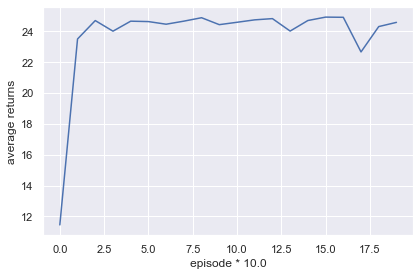

In [7]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set()
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


noise = 0.1
epsilon = 0.1
episode_limit = 100
n_agents = 5
batch_size = 256
evaluate_rate = 1000
time_steps = 20000
evaluate_episode_len = 100
evaluate_episodes = 100
env = CournotDuopoly(agent_num=n_agents)
agents = [MADDPG(n_agents, i, obs_shape=1, action_shape=1) for 
          i in range(n_agents)]
buffer = Buffer(n_agents=n_agents)

returns = []
done = None
mean_return_eval = 0.
for time_step in tqdm(range(time_steps)):
    if time_step % episode_limit == 0 or np.all(done):
        s = env.reset()
    u = []
    actions = []
    with torch.no_grad():
        for agent_id, agent in enumerate(agents):
            action = agent.select_action(s[agent_id], noise, epsilon)
            u.append(action)
            actions.append(action)

    s_next, r, done, info = env.step(actions)
    buffer.store_episode(s[:n_agents], u,
                         r[:n_agents], s_next[:n_agents])

    s = s_next

    if buffer.current_size >= batch_size:
        transitions = buffer.sample(batch_size)
        for agent in agents:
            other_agents = agents.copy()
            other_agents.remove(agent)
            agent.learn(transitions, other_agents)

    if time_step == 0 or time_step % evaluate_rate == 0:
        mean_return_eval = evaluate(env, agents, n_agents,
                                    evaluate_episodes, evaluate_episode_len)
        returns.append(mean_return_eval)
print(mean_return_eval)
plt.figure()
plt.plot(range(len(returns)), np.array(returns).sum(-1))
plt.xlabel('episode * ' + str(evaluate_rate / episode_limit))
plt.ylabel('average returns')
plt.tight_layout()
plt.show()